# Weed Detection using Convolutional Neural Networks

In [1]:
import io
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import os.path
import glob
import cv2
from PIL import Image
import numpy as np
from keras.layers import Input
import pandas as pd
from keras.layers import concatenate
import keras.engine.training 
from sklearn.utils import shuffle
from keras.layers import Input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [3]:
X  =[] 
Y = [] 
image_size = (227, 227)

for i in labels:
    Datasetspath = r"C:\Users\Devansh Sharma\Desktop\capstone\dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

C:\Users\Devansh Sharma\Desktop\capstone\dataset/broadleaf/
1191
C:\Users\Devansh Sharma\Desktop\capstone\dataset/grass/
3520
C:\Users\Devansh Sharma\Desktop\capstone\dataset/soil/
3249
C:\Users\Devansh Sharma\Desktop\capstone\dataset/soybean/
7376


In [4]:
for i in labels:
    Datasetspath = r"C:\Users\Devansh Sharma\Desktop\capstone\dataset/"+i+"/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])

C:\Users\Devansh Sharma\Desktop\capstone\dataset/broadleaf/
C:\Users\Devansh Sharma\Desktop\capstone\dataset/broadleaf\10.tif
C:\Users\Devansh Sharma\Desktop\capstone\dataset/grass/
C:\Users\Devansh Sharma\Desktop\capstone\dataset/grass\10.tif
C:\Users\Devansh Sharma\Desktop\capstone\dataset/soil/
C:\Users\Devansh Sharma\Desktop\capstone\dataset/soil\10.tif
C:\Users\Devansh Sharma\Desktop\capstone\dataset/soybean/
C:\Users\Devansh Sharma\Desktop\capstone\dataset/soybean\10.tif


In [5]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [7]:
X_train.shape, Y_train.shape

((9661, 227, 227, 3), (9661, 4))

In [8]:
X_test.shape, Y_test.shape

((4601, 227, 227, 3), (4601, 4))

In [9]:
X_val.shape, Y_val.shape

((1074, 227, 227, 3), (1074, 4))

In [10]:
from keras.layers import Concatenate

input_shape1 = (227, 227, 3)
input_shape2 = (227, 227, 3)


model1 = Sequential([
    Conv2D(20,kernel_size=(5,5), activation='relu', input_shape=input_shape1),
    MaxPooling2D((2,2)),
    Conv2D(30,kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(40,kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(50,kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(60,kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    
])


model2 = Sequential([
    Conv2D(20,kernel_size=(5,5), activation='relu', dilation_rate=(3), input_shape=input_shape2),
    MaxPooling2D((2,2)),
    Conv2D(30,kernel_size=(3,3), activation='relu', dilation_rate=(2)),
    MaxPooling2D((2,2)),
    Conv2D(40,kernel_size=(3,3), activation='relu', dilation_rate=(2)),
    MaxPooling2D((2,2)),
    Conv2D(50,kernel_size=(3,3), activation='relu', dilation_rate=(1)),
    MaxPooling2D((2,2)),
    Conv2D(60,kernel_size=(3,3), activation='relu', dilation_rate=(1)),
    MaxPooling2D((2,2)),
    Flatten(),
  
])


concatenated = Concatenate()([model1.output, model2.output])

x = Flatten()(concatenated)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)


final_model = Model(inputs=[model1.input, model2.input], outputs=output)


In [11]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_input (InputLayer)      [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5_input (InputLayer)    [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 223, 223, 20  1520        ['conv2d_input[0][0]']           
                                )                                                             

In [12]:
from keras.optimizers.legacy.adam import Adam
optimizer = Adam(learning_rate=0.0001)
final_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [13]:
history = final_model.fit([X_train, X_train], Y_train, validation_data=([X_test,X_test], Y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
302/302 [==============================] - 551s 2s/step - loss: 0.8560 - accuracy: 0.7546 - val_loss: 0.4356 - val_accuracy: 0.8418
Epoch 2/50
302/302 [==============================] - 561s 2s/step - loss: 0.3527 - accuracy: 0.8689 - val_loss: 0.3338 - val_accuracy: 0.8729
Epoch 3/50
302/302 [==============================] - 554s 2s/step - loss: 0.2758 - accuracy: 0.8955 - val_loss: 0.3229 - val_accuracy: 0.8744
Epoch 4/50
302/302 [==============================] - 541s 2s/step - loss: 0.2260 - accuracy: 0.9164 - val_loss: 0.2359 - val_accuracy: 0.9085
Epoch 5/50
302/302 [==============================] - 545s 2s/step - loss: 0.1766 - accuracy: 0.9316 - val_loss: 0.2525 - val_accuracy: 0.9107
Epoch 6/50
302/302 [==============================] - 543s 2s/step - loss: 0.1465 - accuracy: 0.9467 - val_loss: 0.2480 - val_accuracy: 0.9070
Epoch 7/50
302/302 [==============================] - 555s 2s/step - loss: 0.1074 - accuracy: 0.9618 - val_loss: 0.2529 - val_accuracy: 0.9096

In [14]:
val = history.history
print (val)


{'loss': [0.8560419678688049, 0.3527078330516815, 0.2758055031299591, 0.22598157823085785, 0.1765756458044052, 0.1465173214673996, 0.10737598687410355, 0.09338869154453278, 0.07762712985277176, 0.06395360082387924, 0.05856246501207352, 0.05972820892930031, 0.026101240888237953, 0.0122707299888134, 0.02579379267990589, 0.03237822651863098, 0.05127395689487457, 0.007537759840488434, 0.0035981186665594578, 0.001816291594877839, 0.0010316455736756325, 0.0007578507647849619, 0.0006083223270252347, 0.0004716353432741016, 0.0003689203003887087, 0.00031123566441237926, 0.0002633861149661243, 0.0002117547846864909, 0.00017738284077495337, 0.00014842652308288962, 0.00012722870451398194, 0.00010647651652107015, 8.499886462232098e-05, 6.948287773411721e-05, 6.070897507015616e-05, 5.121567301102914e-05, 4.556975909508765e-05, 3.492410542094149e-05, 3.0606548534706235e-05, 2.6250789233017713e-05, 2.01741058845073e-05, 1.6519594282726757e-05, 1.3706184290640522e-05, 1.1118699148937594e-05, 9.08685706

In [15]:
loss, accuracy = final_model.evaluate([X_val, X_val], Y_val)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


34/34 [==============================] - 22s 657ms/step - loss: 0.2790 - accuracy: 0.9628
Test loss: 0.27898111939430237
Test accuracy: 0.9627560377120972


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = final_model.predict([X_val, X_val])
Y_pred_classes = np.argmax(Y_pred, axis=1)

Y_test_classes = np.argmax(Y_val, axis=1)

confusion_mtx = confusion_matrix(Y_test_classes, Y_pred_classes)

print(confusion_mtx)

34/34 [==============================] - 28s 794ms/step
[[ 67  17   0   2]
 [  6 215   1   8]
 [  0   0 238   0]
 [  1   5   0 514]]


<Axes: >

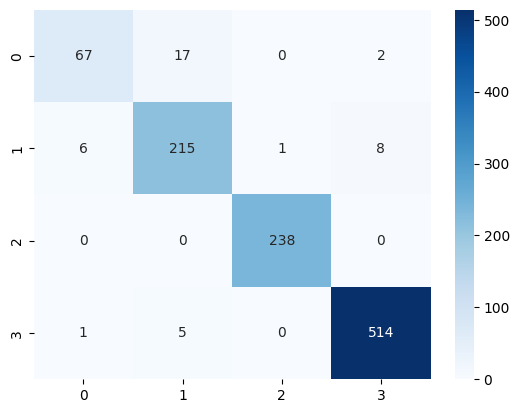

In [19]:
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues")

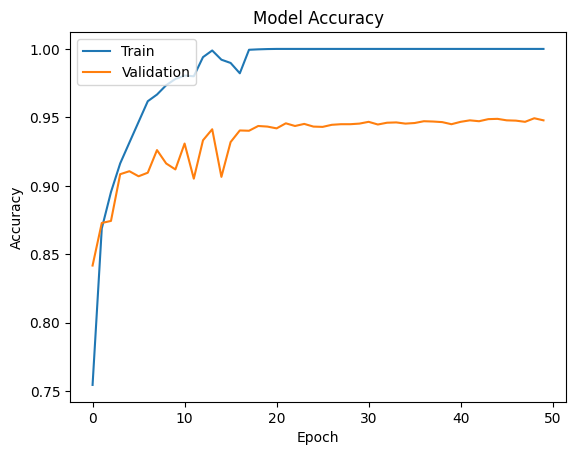

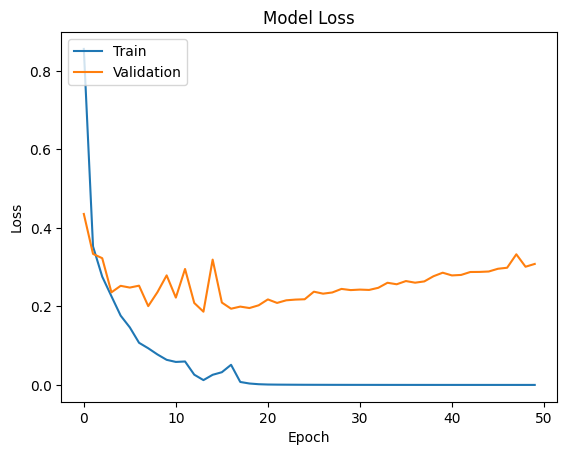

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
